In [1]:
# Import the requried libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import scipy.stats as stats

In [2]:
# Loading the csv file into a pandas dataframe
df=pd.read_csv('Week_8_Q&A_dataset - Sheet1.csv')
df

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21
5,female,completed,40
6,male,none,30
7,female,none,12
8,male,none,18
9,male,none,24


### 1. Carry out descriptive analytics on the dataset.

In [3]:
# summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            28 non-null     object
 1   Test preparation  28 non-null     object
 2   Total Marks       28 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 800.0+ bytes


This dataset contains the following data

there is 28 rows and 3 features. this dataset has Gender, Test preparation and Total Marks features.

In [4]:
# Calculating the null values present in each columns in the dataset
df.isna().sum() # or you can use df.isnull().sum() as well

Gender              0
Test preparation    0
Total Marks         0
dtype: int64

As you can see that, there is no missing values present in the dataset. so we can move to the data visualization 

In [5]:
# statistical summary of the data
df.describe().T # diagonal by writing rows as columns 

,count,mean,std,min,25%,50%,75%,max
Total Marks,28.0,32.321429,12.45452,12.0,22.5,33.0,43.25,50.0


This is the complete statisticsl summary of the data. where maximum and minimum mark of total mark is 50 and 12. top 25% total marks in 43.25 and more. Also least total marks is 22.5 and less. Average sample marks is 32.32 and standard deviation is 12.45

In [6]:
# calculating the gender feature with values inside in the dataset
df.Gender.value_counts()

female    16
male      12
Name: Gender, dtype: int64

In [7]:
# calculating the gender feature with test preparation and total marks inside in the dataset
df.groupby('Gender').count() 

,Test preparation,Total Marks
Gender,,
female,16,16
male,12,12


As you can see there are 16 females and 12 males out of 28 sample size in the data set

In [8]:
# calculating the gender feature with test preparation and total marks inside in the dataset
df.groupby('Test preparation').count()

,Gender,Total Marks
Test preparation,,
completed,7,7
none,21,21


As per the test preparation, where 7 are completed the test preparation and 21 are not out of 28 samples.

In [9]:
# Categorical data visualization
colors = ['#ede0d4','#e6ccb2','#ddb892','#b08968','#7f5539','#9c6644','#dda15e'] # different colors for graph color

# we can create a fuction to display the univariate analysis

def cat_univariate_analysis(feature): 
    
    #calculate the each column values inside and sort the order for better view
    data_ = df[feature].value_counts().sort_values(ascending=True) 

    # set the graph size and color
    plt.figure(figsize=(20,5), facecolor='white')

    # display the first graph in one visualization
    plt.subplot(1,2,1)

    # using barh for horizonatal view of bar chart
    plt.barh(y=data_.index, width=data_.values, 
             height=0.7, color=colors, edgecolor='k',linewidth=1)
    
    # The despine() is a function that removes the spines from the right and upper portion of the plot by default
    sns.despine() 

    # display the second graph in one visualization
    ax = plt.subplot(1,2,2)

    # using pie chart you can see the circle portion of how each values differ from each portion.
    ax.pie(x=data_.values, 
           labels=data_.index, 
           colors=colors, 
           radius=1.2, 
           autopct="%1.1f%%", 
           shadow=True, 
           explode=[0.04 for i in range(df[feature].nunique())]) # number of unique count in each column
    
    # display the circle for pie chart
    ax.add_artist(plt.Circle((0,0), 0.4, fc='white'))
    plt.suptitle(t=feature, x=0.5, y=1.1, fontfamily='serif', fontsize=20, color='k', fontweight='bold',alpha=0.8)
    plt.show()

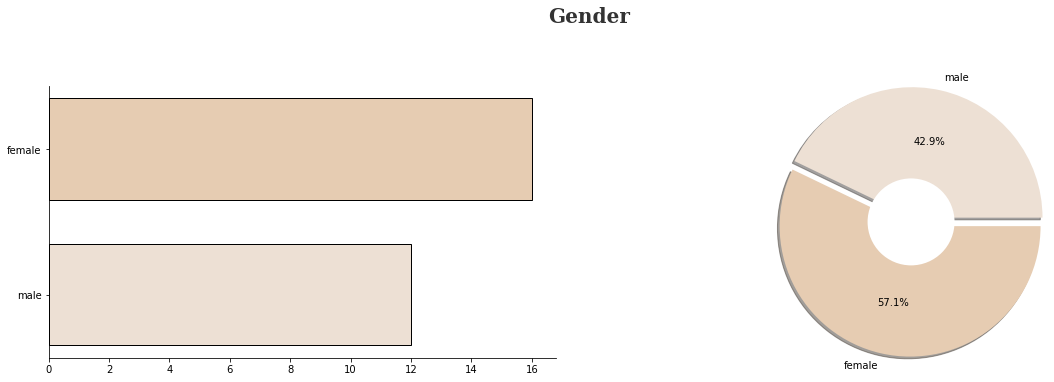

In [10]:
# calling the fuction with gender feature for clear data visualization
cat_univariate_analysis('Gender')

In gender feature, we can clearly see the bar horizontal view and pie chart view of gender. 
There are 16 females and 12 males are participated in the test.

In [11]:
# calculating the gender wise average score for total marks
avg_total_marks_gender = df.groupby('Gender')['Total Marks'].mean()
avg_total_marks_gender

Gender
female    33.750000
male      30.416667
Name: Total Marks, dtype: float64

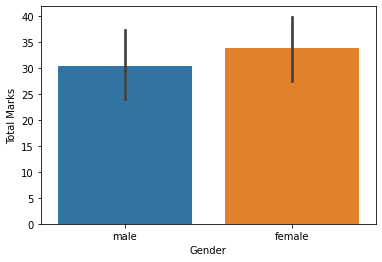

In [12]:
# barplot visualization with gender feature and total marks
sns.barplot(x = 'Gender', y = 'Total Marks', data = df)
 
# Show the plot
plt.show()

Based on the gender, females have scored the most on average for total marks while males have less on average.

In [13]:
# calculating the test preparation wise average score for total marks
avg_total_marks_Test_preparation = df.groupby('Test preparation')['Total Marks'].mean()
avg_total_marks_Test_preparation

Test preparation
completed    44.571429
none         28.238095
Name: Total Marks, dtype: float64

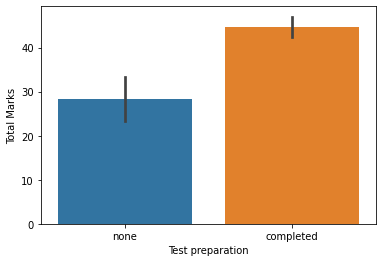

In [14]:
# barplot visualization with test preparation feature and total marks
sns.barplot(x = 'Test preparation', y = 'Total Marks', data = df)
 
# Show the plot
plt.show()

Based on Test preparation course, those who completed the course scored more total marks while those who do not completed the course scored less total marks.

In [15]:
# checking the scoring variation for Total marks in gender
total_marks_gender = df.groupby('Gender')['Total Marks'].describe()
total_marks_gender

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
female,16.0,33.750000,12.865976,12.0,25.50,39.0,43.50,50.0
male,12.0,30.416667,12.168950,14.0,21.75,29.0,43.25,47.0


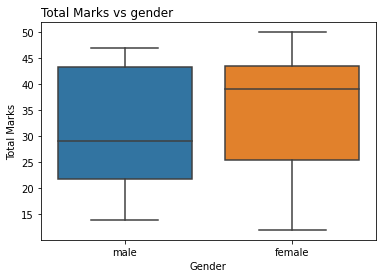

In [16]:
sns.boxplot(x=df["Gender"], y=df['Total Marks']) # checking any outliers present in the dataset 
plt.title('Total Marks'+" vs gender", loc="left")
plt.show()

Based on the gender score variation for total marks using boxplot you can clearly say that outliers is not present in this features

In [17]:
# checking the scoring variation for Total marks in test preparation
total_marks_test_preparation = df.groupby('Test preparation')['Total Marks'].describe()
total_marks_test_preparation

,count,mean,std,min,25%,50%,75%,max
Test preparation,,,,,,,,
completed,7.0,44.571429,3.359422,40.0,43.0,44.0,46.0,50.0
none,21.0,28.238095,11.661495,12.0,18.0,27.0,38.0,48.0


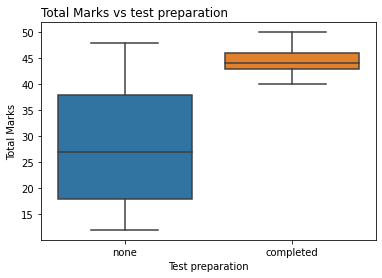

In [18]:
sns.boxplot(x=df["Test preparation"], y=df['Total Marks']) # checking any outliers present in the dataset 
plt.title('Total Marks'+" vs test preparation", loc="left")
plt.show()

Based on the test preparation score variation for total marks using boxplot you can clearly say that outliers is not present in this features

### 2 Check whether female and male students scored the same marks.

**Hypothesis**
- (Null Hypothesis) H0: female and male students scored the same marks
- (Alternate Hypothesis) H1: female and male students doesn't scored the same marks**

From the hypothesis we can clearly say that there is two tailed t test and we need to check the both sides score(increase and decrease) also we can say that 95% confidence interval(default - if not mentioned). And probability is 0.05 or 5%.

In [19]:
# assign gender values to the variables
female=df[df['Gender']=='female']
male=df[df['Gender']=='male']

In [20]:
# display the female values
female

,Gender,Test preparation,Total Marks
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21
5,female,completed,40
7,female,none,12
14,female,none,41
15,female,none,13
16,female,completed,48
17,female,none,45


In [21]:
# display the male values
male

,Gender,Test preparation,Total Marks
0,male,none,14
6,male,none,30
8,male,none,18
9,male,none,24
10,male,completed,44
11,male,none,23
12,male,completed,43
13,male,none,28
18,male,none,47
19,male,none,36


In [22]:
# remove the Test preparation and Gender features from male and female

female = female.drop(['Test preparation','Gender'],axis=1)
male = male.drop(['Test preparation','Gender'],axis=1)

In [23]:
# display the female values after removing the features
female

,Total Marks
1,28
2,18
3,48
4,21
5,40
7,12
14,41
15,13
16,48
17,45


In [24]:
# display the male values after removing the features
male

,Total Marks
0,14
6,30
8,18
9,24
10,44
11,23
12,43
13,28
18,47
19,36


In [25]:
# ttest independence 
tvalue, pvalue = stats.ttest_ind(female,male)

In [26]:
# values of tvalue and pvalue
stats.ttest_ind(female,male)

Ttest_indResult(statistic=array([0.69408853]), pvalue=array([0.49378223]))

In [27]:
# 2 tail t test since marks can increase or decrease
tcriteria=(stats.t.ppf((0.05/2), 26))

In [28]:
# Percent Point Function
stats.t.ppf((0.05/2), 26)

-2.0555294386428713

test statistics > test criteria and pvalue < 0.05

In [29]:
# checking Hypothesis condition
if np.abs(tvalue)>np.abs(tcriteria) and pvalue <0.05:
    print('Reject null hypothesis : female and male students scored the same marks')
else:
    print('Reject alternate hypothesis : female and male students does not scored the same marks')

Reject alternate hypothesis : female and male students does not scored the same marks


So we can clearly say that, we failed to reject the null hypothesis and there is a chance that female and male students scored the same marks

### 3. Whether test preparation helps the students?

**Hypothesis**

- (Null Hypothesis) H0: test preparation helps the students
- (Alternate Hypothesis) H1: test preparation doesn't helps the students

In [30]:
# assign test preparation values to the variables
test_preparation_completed=df[df['Test preparation']=='completed']
test_preparation_not_completed=df[df['Test preparation']=='none']

In [31]:
# display the completed test preparation values
test_preparation_completed

,Gender,Test preparation,Total Marks
5,female,completed,40
10,male,completed,44
12,male,completed,43
16,female,completed,48
21,male,completed,44
26,female,completed,50
27,female,completed,43


In [32]:
# display the test preparation of not completed values
test_preparation_not_completed

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21
6,male,none,30
7,female,none,12
8,male,none,18
9,male,none,24
11,male,none,23


In [33]:
# remove the test preparation and Gender features from completed and not completed

test_preparation_completed=test_preparation_completed.drop(['Test preparation','Gender'],axis=1)
test_preparation_not_completed=test_preparation_not_completed.drop(['Test preparation','Gender'],axis=1)

In [34]:
# display the completed test preparation values after removing the features
test_preparation_completed

,Total Marks
5,40
10,44
12,43
16,48
21,44
26,50
27,43


In [35]:
# display the test preparation of not completed values after removing the features
test_preparation_not_completed

,Total Marks
0,14
1,28
2,18
3,48
4,21
6,30
7,12
8,18
9,24
11,23


In [36]:
# ttest independence 
tvalue, pvalue = stats.ttest_ind(test_preparation_completed,test_preparation_not_completed)

In [37]:
# values of tvalue and pvalue
stats.ttest_ind(test_preparation_completed,test_preparation_not_completed)

Ttest_indResult(statistic=array([3.61436375]), pvalue=array([0.00126713]))

In [38]:
# Percent Point Function
tcriteria=stats.t.ppf((1-0.05), 26)

In [39]:
# Right tailed test since we are checking marks is increasing
stats.t.ppf((1-0.05), 26)

1.7056179197592727

test statistics > test criteria and pvalue < 0.05

In [42]:
# checking Hypothesis condition
if (tvalue>tcriteria and pvalue <0.05): # or we can use 'np.abs(tvalue)>np.abs(tcriteria) and pvalue <0.05'
    print('Reject H0: Test Preparation help students')
else:
    print('Reject H1:Test Preparation does not help students')

Reject H0: Test Preparation help students


So we can clearly say that, the null hypothesis is rejected and there is no evidence that test Preparation help the students